In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
def simple_plot(x, y):
    fig, ax = plt.subplots()
    ax.plot(x, y, 'o-')

    ax.set(xlabel='time (s)', ylabel='number of samples',
       title='Performance')
    ax.grid()

#fig.savefig("test.png")
    plt.show()

## Q1) This problem was recently asked by Google.

Given a list of numbers and a number k, return whether any two numbers from the list add up to k.

For example, given [10, 15, 3, 7] and k of 17, return true since 10 + 7 is 17.

Bonus: Can you do this in one pass?

OBS: Complexity O(n) because uses dict which is a hash table, so the operation in average is O(1)

Pair with given sum 3 is (1, 2)
Pair with given sum 3 is (1, 2)
Pair with given sum 3 is (1, 2)
Pair with given sum 3 is (1, 2)
Pair with given sum 3 is (1, 2)


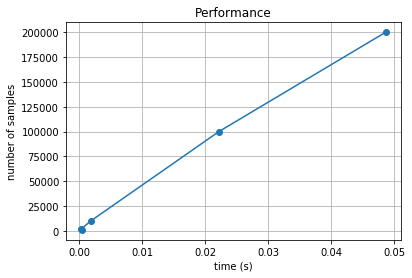

In [2]:
import time
import random

def two_sum_k(array, k):
    start = time.time()    
    #for i,val in enumerate(array):
    #    if k - val in array[i+1:]:
    #        print("Solution found : ", str(k - val)," + " ,str(array[i]))
    #        break
    #else:
    #    print ("No Solution Found")
    #s = set() 
    d = dict() 
    for i in range(0, len(array)): 
        temp = k-array[i] 
        if (temp in d): 
            print ("Pair with given sum "+ str(k) + " is (" + str(array[i]) + ", " + str(temp) + ")")
            break
        d[i] = (array[i]) 
    else:
        print("No solution was found")
    #print ()
    return result, (time.time() - start)

sizes = [1000,2000, 10000, 100000,200000]
seconds = [0,0,0,0,0]
result = 0
for index,s in enumerate(sizes):
    aux = [random.randint(5, 99999999999) for i in range(s)]
    aux.append(1)
    aux.append(2)
    result, seconds[index] = two_sum_k(aux, 3)
    
simple_plot(seconds,sizes)





## Q2 This problem was asked by Uber.

Given an array of integers, return a new array such that each element at index i of the new array is the product of all the numbers in the original array except the one at i.

For example, if our input was [1, 2, 3, 4, 5], the expected output would be [120, 60, 40, 30, 24]. If our input was [3, 2, 1], the expected output would be [2, 3, 6].

Follow-up: what if you can't use division?

In [3]:
#First Solution
def multiply_index_out(array): #8
    #Without considering that zero will be in the array
    #Can use extra space or division
    mult = 1
    for val in array:
        mult *= val
    
    result =[]
    for val in array:
        result.append(mult/val)
    print (result)

#time O(n)
#space O(n)
#multiply_index_out([1,2,3,4,5])

#Second Solution (brute force)
def mult_except_one(array):
    result = []
    
    for i in range(0,len(array)):
        aux=1    
        j = (i+1) % len(array)
        while ( j % len(array) !=  i ):
            aux = aux*array[j % len(array)]
            j+= 1  
        
        result.append(aux)
        
    print(result)
#mult_except_one([1,2,3,4,5])

#O(n²)

#Third Solution (bonus: without_division and faster)
def mult_except_one2(array): 
    aux = 1
    mult = [1 for i in range(len(array))] 
    
    for i in range(0, len(array)):
        mult[i] = aux
        aux *= array[i]

    aux = 1
    for i in range(len(array)-1, -1,-1):
        mult[i] *= aux
        aux *= array[i]
    
    print (mult)
#Time: O(n)
#Space: O(n)
mult_except_one2([1,2,3,4,5])


[120, 60, 40, 30, 24]


## Q3 This problem was asked by Google.

Given the root to a binary tree, implement serialize(root), which serializes the tree into a string, and deserialize(s), which deserializes the string back into the tree.

In [4]:
class Node: #45
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def serialize(head): #O(n)
    if head == None:
        return ""
    
    result = head.val
    if head.left != None:
        result += "[" + serialize(head.left)+ "]"
    if head.right != None:
        result += "[" + serialize(head.right) +"]"
    
    return result

def deserialize(myString, head=None): #O(n)
    pos = myString.find("[")
    val = myString[:pos]
    
    count = 0
    count2 =0
    
    left,right = None, None
     
    for i in range(0, len(myString)):
        if (myString[i] == "["):
            count +=1
        elif (myString[i] == "]"):
            count2 +=1
        
        if (count == count2 and count!=0):
            left = deserialize(myString[pos+1:i+1])
            pos = i+1
            break

    count = 0
    count2 =0
    for i in range(pos, len(myString)):
        if (myString[i] == "["):
            count +=1
        elif (myString[i] == "]"):
            count2 +=1
        
        if (count == count2 and count!=0):
            right = deserialize(myString[pos+1:i+1])
            
            break
    return Node(val, left, right)
   
        

node = Node('root', Node('left', Node('left.left')), Node('right'))
x = deserialize(serialize(node))
print(x.left.val)
print(x.left.left.val)
print(x.right.val)
print(serialize(node))

assert deserialize(serialize(node)).left.left.val == 'left.left'



left
left.left
right
root[left[left.left]][right]


## Q4 This problem was asked by Stripe.

Given an array of integers, find the first missing positive integer in linear time and constant space. In other words, find the lowest positive integer that does not exist in the array. The array can contain duplicates and negative numbers as well.

For example, the input [3, 4, -1, 1] should give 2. The input [1, 2, 0] should give 3.

You can modify the input array in-place.

In [5]:
def lowest_positive_integer(array):
    j = len(array)-1
    #for i in range(len(array)-1):
    i=0
    while i < len(array)-1 and i < j:
        if array[i] < 0:
            
            aux = array[j]
            array[j] = array[i]
            array[i] = aux
            #print(array[i])

            j-=1
        i+=1
    
    i=0
    aux = array[0]
    print(array)
    while i < (j+2):
        
        if aux < j+1 and aux != -1:
            newAux = array[aux]
            array[aux] =-1
            aux = newAux

        else:
            aux = array[i]
            i+=1
       # print(aux)
    print(array)
    for i in range(len(array)):
        if array[i] != i and array[i]!=-1:
            result = i
            break
    print(result)
    
array = [3,4,-1,1]
array = [-1,1,9,8,9,15,22,1,2,-2,6,3,4,7,12,-1,-1,5,0]
lowest_positive_integer(array)

[0, 1, 9, 8, 9, 15, 22, 1, 2, 5, 6, 3, 4, 7, 12, -1, -1, -2, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 6, 3, -1, 7, 12, -1, -1, -2, -1]
10


## Q5 This problem was asked by Jane Street.

cons(a, b) constructs a pair, and car(pair) and cdr(pair) returns the first and last element of that pair. For example, car(cons(3, 4)) returns 3, and cdr(cons(3, 4)) returns 4.

Given this implementation of cons:

def cons(a, b):
    def pair(f):
        return f(a, b)
    return pair
Implement car and cdr.

In [6]:
def cons(a, b): #Functional programming
    def pair(f):
        return f(a, b)
    return pair

def car(f):
    def first(a, b):
        return a
    return f(first)

def cdr(f):
    def second(a,b):
        return b
    return f(second)

print(car(cons(3,4)))
print(cdr(cons(3,4)))

3
4


## Q6 This problem was asked by Google.

An XOR linked list is a more memory efficient doubly linked list. Instead of each node holding next and prev fields, it holds a field named both, which is an XOR of the next node and the previous node. Implement an XOR linked list; it has an add(element) which adds the element to the end, and a get(index) which returns the node at index.

If using a language that has no pointers (such as Python), you can assume you have access to get_pointer and dereference_pointer functions that converts between nodes and memory addresses.

### skipped


## Q7 This problem was asked by Facebook.

Given the mapping a = 1, b = 2, ... z = 26, and an encoded message, count the number of ways it can be decoded.

For example, the message '111' would give 3, since it could be decoded as 'aaa', 'ka', and 'ak'.

You can assume that the messages are decodable. For example, '001' is not allowed.

In [7]:
def decode_map(str_input):
    
    memo = [None] * len(str_input)
    return decode(str_input, len(str_input) ,memo)

def decode(data,a, memo):
    if a == 0:
        return 1
    
    b = len(data) - a
    
    if memo[a-1] !=None:
        return memo[a]
    
    result = decode(data, a-1, memo)
    if a > 1 and int(data[b:b+2]) < 26:
        result += decode(data, a-2,memo)
        memo[a-1] = result
    return result

decode_map('111')

3

## Q8 This problem was asked by Google.

A unival tree (which stands for "universal value") is a tree where all nodes under it have the same value.

Given the root to a binary tree, count the number of unival subtrees.

For example, the following tree has 5 unival subtrees:

   0
   
  / \
 
 1   0

    /\
   
    1  0
  
   / \
 
   1   1

  a
 / \
c   b
    /\
   b  b
        \
         b

In [8]:
class TreeNode():
    def __init__(self, data, left=None, right=None):
        self.data = data
        self.right = right
        self.left = left
        
root = TreeNode('0')
root.left = TreeNode('1')
root.right = TreeNode('0')
root.right.left = TreeNode('1')
root.right.right = TreeNode('0')
root.right.left.left = TreeNode('1')
root.right.left.right = TreeNode('1')

head = TreeNode('a')
head.left = TreeNode('c')
head.right = TreeNode('b')
head.right.left = TreeNode('b')
head.right.right = TreeNode('b')
head.right.right.right = TreeNode('b')

start = TreeNode('a')
start.left = TreeNode('a')
start.right = TreeNode('a')
start.right.left = TreeNode('a')
start.right.right = TreeNode('a')
start.right.right.right = TreeNode('A')

#First Solution #O(n²) Top-Down
def isUnival(root, val): 
    if root == None:
        return True
    if root.data == val:
        return isUnival(root.left, val) and isUnival(root.right, val)
    return False

def univalCount(root):
    if root == None:
        return 0
    left = univalCount(root.left)
    right = univalCount(root.right)
    
    result = left + right
    if isUnival(root, root.data):
        result += 1
    return result

#Second solution bottom-up (O(n))

def countUnivalTree(root):
    result, _ = univalTree(root)
    return result

def univalTree(root):
    if root == None:
        return 0, True
    
    
    left, is_unival_left = univalTree(root.left)
    right, is_unival_right = univalTree(root.right)
    
    
    if is_unival_left and is_unival_right:
        
        if root.left == None and root.right == None: # Leaf
            return 1 + left + right, True
        
        #both values equals
        elif (root.left!= None and root.left.data == root.data) and (root.right!= None and root.right.data == root.data):
            return 1 + left +right, True
        
        #One of the child is None and the other is equal to the root
        elif (root.left != None and root.left.data == root.data and root.right == None) or (root.right != None and root.right.data == root.data and root.left == None):
            return 1 + left +right, True
        
        #Resumed if statement
        # if (root.left!= None and root.left.data != root.data) or (root.right!= None and root.right.data != root.data):
       #     return  right + left, False    
    
       # return 1 + left + right, True
        
        return left + right, False
    return left + right, False
#univalCount(root)
#univalCount(head)
#univalCount(start)
countUnivalTree(start)
#countUnivalTree(root)
#countUnivalTree(head)

3

## Q9 This problem was asked by Airbnb.

Given a list of integers, write a function that returns the largest sum of non-adjacent numbers. Numbers can be 0 or negative.

For example, [2, 4, 6, 2, 5] should return 13, since we pick 2, 6, and 5. [5, 1, 1, 5] should return 10, since we pick 5 and 5.

Follow-up: Can you do this in O(N) time and constant space?

In [9]:
def largest_nonAdjacentSum(input_array):
    if (len(input_array) == 0):
        return 0
    
    a = 0
    b = 0
    
    for val in input_array:
        if (b > a):
            b2 = b
        else:
            b2 = a
        
        a = b + val
        b = b2
    
    return b if b >a else a
    
    
print(largest_nonAdjacentSum([2,4,6,2,5]))
print(largest_nonAdjacentSum([2,4,-6,2,5]))
print(largest_nonAdjacentSum([5,1,1,5]))

13
9
10


## Q10 This problem was asked by Apple.

Implement a job scheduler which takes in a function f and an integer n, and calls f after n milliseconds.

In [10]:
import time

def job_scheduler(f, n):
    time.sleep(n)
    print(f)
def func(a,b):
    return a+b

job_scheduler(func(10,20), 3/100)

30


## Q11 This problem was asked by Twitter.

Implement an autocomplete system. That is, given a query string s and a set of all possible query strings, return all strings in the set that have s as a prefix.

For example, given the query string de and the set of strings [dog, deer, deal], return [deer, deal].

Hint: Try preprocessing the dictionary into a more efficient data structure to speed up queries.

## Q12 This problem was asked by Amazon.

There exists a staircase with N steps, and you can climb up either 1 or 2 steps at a time. Given N, write a function that returns the number of unique ways you can climb the staircase. The order of the steps matters.

For example, if N is 4, then there are 5 unique ways:

1, 1, 1, 1
2, 1, 1
1, 2, 1
1, 1, 2
2, 2
What if, instead of being able to climb 1 or 2 steps at a time, you could climb any number from a set of positive integers X? For example, if X = {1, 3, 5}, you could climb 1, 3, or 5 steps at a time.

In [11]:
def climbStairs(n, step):
    if n <= 1:
        return 1
    memo = [None] * (n )
    
    
    if memo[n-1] != None:
        return memo[n-1]
    else:
        result = 0
        for i in range (len(steps)):
            if n - step[i] >=0:
                
                result += climbStairs(n - step[i],steps)
                memo[n-1] = result
            
    #print(memo)
    return result



n =4
steps = [1,3,5]


climbStairs(n, steps)

3

## Q13 This problem was asked by Amazon.

Given an integer k and a string s, find the length of the longest substring that contains at most k distinct characters.

For example, given s = "abcba" and k = 2, the longest substring with k distinct characters is "bcb".

In [12]:
def distinctKSubstring(k, s):
     
    aux = ""
    result = ""
    aux_i = 0
    i = 1
    while (i<= len(s)):
        aux = s[aux_i:i]
        count = countChars(aux)
        if count <= k and len(result) < len(aux):
            result = aux
            i+=1
        elif count > k:
            aux_i += 1
        else:
            i+=1
    return result

def countChars(s):
    letters = {}
    for i in s:
        if i not in letters:
            letters[i] = 1
    result = 0
    for i in letters:
        result +=1
    return result

distinctKSubstring(3, "abcba")    

'abcba'

## Q14 This problem was asked by Google.

The area of a circle is defined as πr^2. Estimate π to 3 decimal places using a Monte Carlo method.

Hint: The basic equation of a circle is x2 + y2 = r2.



In [13]:
import random
def estimatePI():
    
    inCircle = 0
    inSquare = 1000000
    
    
    for i in range(0,inSquare):
        x = random.random()
        y = random.random()
        
    
        if ((x * x) + (y*y)) <= 1 :
            inCircle += 1
        
    pi = round((4 * (inCircle)) / inSquare , 3) 
    print(pi)

    
estimatePI()

3.142


## Q15 This problem was asked by Facebook.

Given a stream of elements too large to store in memory, pick a random element from the stream with uniform probability.



In [14]:
import random

def selectRandom(elements):
    print(random.choice(elements))

#selectRandom([1,2,3,4,5,6,7,8,9,10])

def selectRandom2(elements): #Reservoir algorithm
    random_element = None
    for i, element in enumerate(elements):
        if i == 0:
            random_element = element
        elif random.randint(1, i+1) == 1:
            random_element = element
        
    print(random_element)
        
selectRandom2([1,2,3,4,5,6,7,8,9,10])


1


## Q16 This problem was asked by Twitter.

You run an e-commerce website and want to record the last N order ids in a log. Implement a data structure to accomplish this, with the following API:

record(order_id): adds the order_id to the log
get_last(i): gets the ith last element from the log. i is guaranteed to be smaller than or equal to N.
You should be as efficient with time and space as possible.

In [15]:
class CList(): #Circular List
    def __init__(self, size):
        self.buffer = [None] * size
        self.index = 0
    
    def record(self, order_id):
        self.buffer[self.index] = order_id
        self.index += 1
        
        if self.index == len(self.buffer):
            self.index = 0
    
    def get_last(self, i):
        start = self.index - i
        
        if start < 0:
            print (self.buffer[start:])
            #print (self.buffer[start:] + self.buffer[:index])
        
        else:  
            print( self.buffer[start:self.index])
            
x = CList(10)

x.record(1)

x.record(3)

x.record(5)

x.record(7)

x.get_last(3)


[3, 5, 7]


## Q17 This problem was asked by Google.

Suppose we represent our file system by a string in the following manner:

The string "dir\n\tsubdir1\n\tsubdir2\n\t\tfile.ext" represents:

dir

    subdir1

    subdir2

        file.ext
The directory dir contains an empty sub-directory subdir1 and a sub-directory subdir2 containing a file file.ext.

The string "dir\n\tsubdir1\n\t\tfile1.ext\n\t\tsubsubdir1\n\tsubdir2\n\t\tsubsubdir2\n\t\t\tfile2.ext" represents:

dir
    
    subdir1
    
        file1.ext
            
            subsubdir1
    
    subdir2
    
        subsubdir2
        
            file2.ext
            
            
The directory dir contains two sub-directories subdir1 and subdir2. subdir1 contains a file file1.ext and an empty second-level sub-directory subsubdir1. subdir2 contains a second-level sub-directory subsubdir2 containing a file file2.ext.

We are interested in finding the longest (number of characters) absolute path to a file within our file system. For example, in the second example above, the longest absolute path is "dir/subdir2/subsubdir2/file2.ext", and its length is 32 (not including the double quotes).

Given a string representing the file system in the above format, return the length of the longest absolute path to a file in the abstracted file system. If there is no file in the system, return 0.

Note:

The name of a file contains at least a period and an extension.

The name of a directory or sub-directory will not contain a period.

In [16]:
string = "dir\n\tsubdir1\n\t\tfile1.ext\n\t\tsubsubdir1\n\t\t\tsubsubsubdir\n\t\t\t\t1a.txt\n\tsubdir2\n\t\tsubsubdir2\n\t\t\tfile2.ext"
#string = "dir\n\tsubdir1\n\t\tfile1.ext\n\t\tsubsubdir1\n\tsubdir2\n\t\tsubsubdir2\n\t\t\tfile2.ext"
#string = "dir\n\tsubdir1\n\t\tsubsubdir1\n\tsubdir2\n\t\tsubsubdir2"
def lengthLongestPath(string):
    #count = 0
    myList = string.split("\n")
    currentPath = []
    lastLevel = 0
    finalPath = ""
    for val in myList:
        level = 0
        while val[level]=="\t":
            level+=1
        name = val[level:]
        if "." not in name:
                if level+1 > len(currentPath):
                    currentPath.append(name)
                else:
                    currentPath[level] = name
            
        else:
                if lastLevel < level:
                    finalPath = "/".join(currentPath[:level] + [name])
                    lastLevel = level
                    #count = len(finalPath)
    return len(finalPath)
    
lengthLongestPath(string)
    

42

## Q18 This problem was asked by Google.

Given an array of integers and a number k, where 1 <= k <= length of the array, compute the maximum values of each subarray of length k.

For example, given array = [10, 5, 2, 7, 8, 7] and k = 3, we should get: [10, 7, 8, 8], since:

10 = max(10, 5, 2)

7 = max(5, 2, 7)

8 = max(2, 7, 8)

8 = max(7, 8, 7)

Do this in O(n) time and O(k) space. You can modify the input array in-place and you do not need to store the results. You can simply print them out as you compute them.

In [17]:
def maxSubstrings(array, k): # Time -> O(n+k)
    subList = []
    final = []
    for i in range(len(array)):
        subList.append(array[i])
        if len(subList) == k:
            final.append(max(subList))
            subList.pop(0)
        
    return final
    
array = [10, 5, 2, 7, 8, 7]

assert (maxSubstrings(array,3) == [10,7,8,8]), "ERROR"

## Q19 This problem was asked by Facebook.

A builder is looking to build a row of N houses that can be of K different colors. He has a goal of minimizing cost while ensuring that no two neighboring houses are of the same color.

Given an N by K matrix where the nth row and kth column represents the cost to build the nth house with kth color, return the minimum cost which achieves this goal.

## Q20 This problem was asked by Google.

Given two singly linked lists that intersect at some point, find the intersecting node. The lists are non-cyclical.

For example, given A = 3 -> 7 -> 8 -> 10 and B = 99 -> 1 -> 8 -> 10, return the node with value 8.

In this example, assume nodes with the same value are the exact same node objects.

Do this in O(M + N) time (where M and N are the lengths of the lists) and constant space.


In [18]:
class LinkedList():
    def __init__(self,val):
        self.val = val
        self.next = None
    

def getLength(root):
    if root == None:
        return 0
    
    return 1 +getLength(root.next)

def findIntersection(head1, head2, d):
    while d > 0:
        head1 = head1.next
        d -=1
    
    while head1.val != head2.val:
        head1 = head1.next
        head2 = head2.next
    
    return head1.val
    

def getIntersection(head1, head2 ):
    length1 = getLength(head1)
    length2 = getLength(head2)
    
    distance = abs(length1 - length2)
    #print(distance)
    result = None
    if (length2 > length1):
        result = findIntersection(head2, head1, distance)
    
    else:
        result = findIntersection(head1,head2, distance)
        
    print(result)
    
head = LinkedList(3)
head.next = LinkedList(7)
head.next.next = LinkedList(8)
head.next.next.next = LinkedList(10)


root = LinkedList(99)
root.next = LinkedList(1)
root.next = LinkedList(7)
root.next.next = LinkedList(8)
root.next.next.next = LinkedList(10)

getIntersection(head, root)

7


## Q21 This problem was asked by Snapchat.

Given an array of time intervals (start, end) for classroom lectures (possibly overlapping), find the minimum number of rooms required.

For example, given [(30, 75), (0, 50), (60, 150)], you should return 2.

In [28]:
def merge_sort_tuples(array, first, last):
    
    if first < last:
        middle = (last -1 + first ) // 2
    
        merge_sort_tuples(array, first, middle)
        merge_sort_tuples(array, middle+1, last)
        return merge_tuples(array, first, middle, last)

def merge_tuples(array, first, middle, last):
    left = array[first:middle+1]
    right = array[middle+1:last+1]
    
    i = j = 0
    k = first
    
    while i < len(left) and j < len(right):
        if right[j][0] < left[i][0]:
            array[k] = right[j]
            j+=1
        else:
            array[k] = left[i]
            i+=1
        k+=1
    
    while i < len(left):
        array[k] = left[i]
        i+=1
        k+=1
        
    while j < len(right):
        array[k] = right[j]
        j+=1
        k+=1
    return array
    
def minRooms(tuples): #average O(nlogn) # O(n) Space
    if (tuples == []):
        return 0
    elif (len(tuples) >1):
        
        tuples = merge_sort_tuples(tuples, 0 , len(tuples)-1)
    
    max_count = 0
    
    while tuples: 
        min_limit = tuples[0][0] -1
    
        marked = []
    
        for i in range(len(tuples)):
            if tuples[i][0] > min_limit:
                marked.append(i)
                min_limit = tuples[i][1]
                
        for j in marked[::-1]:
            tuples.pop(j)
        
        max_count +=1
                
    return max_count

def minRooms2(tuples): #O(n²)
        
    def minRooms(tuples):
    if (tuples == []):
        return 0
    elif (len(tuples) >1):
        
        tuples = merge_sort_tuples(tuples, 0 , len(tuples)-1)
    
    max_count = 1
    aux = 1

    for i in range(len(tuples)):
        
        for j in range(i+1,len(tuples)):
            if tuples[i][1] > tuples[j][1] : 
                aux+=1
                break
            
            elif tuples[i][1] >= tuples[j][0]: 
                aux +=1
            else:
                break

        max_count = max(max_count, aux)
        aux = 1
        
    return max_count
        
            
    

assert (minRooms([(30, 75), (0, 50), (20, 55), (60, 150), (90,160)])) == 3
assert (minRooms([(20,30)])) == 1
assert (minRooms([])) == 0
assert (minRooms([(60,80), (80,90)])) == 2


[0]
[3, 0]
[0]
[2, 0]
[0]
3
[0]
1
[0]
[0]
2


In [ ]:
def merge_sort_tuples(array, first, last):
    
    if first < last:
        middle = (last -1 + first ) // 2
    
        merge_sort_tuples(array, first, middle)
        merge_sort_tuples(array, middle+1, last)
        return merge_tuples(array, first, middle, last)

def merge_tuples(array, first, middle, last):
    left = array[first:middle+1]
    right = array[middle+1:last+1]
    
    i = j = 0
    k = first
    
    while i < len(left) and j < len(right):
        if right[j][0] < left[i][0]:
            array[k] = right[j]
            j+=1
        else:
            array[k] = left[i]
            i+=1
        k+=1
    
    while i < len(left):
        array[k] = left[i]
        i+=1
        k+=1
        
    while j < len(right):
        array[k] = right[j]
        j+=1
        k+=1
    return array
    
def minRooms(tuples):
    if (tuples == []):
        return 0
    elif (len(tuples) >1):
        
        tuples = merge_sort_tuples(tuples, 0 , len(tuples)-1)
    
    max_count = 1
    aux = 1
    #last_start = last_end = None 
    for i in range(len(tuples)):
        
        for j in range(i+1,len(tuples)):
            if tuples[i][1] > tuples[j][1] : # start1 > end2
                aux+=1
                break
            
            elif tuples[i][1] >= tuples[j][0]: # start2 > 
                aux +=1
            else:
                break
        #last_start, last_end = tuples[i]
        max_count = max(max_count, aux)
        aux = 1
        
    return max_count
            
        
        
        